In [4]:
import numpy as np
import math
from skimage import io
from skimage import morphology 
from skimage import filters
from skimage import measure
from skimage import exposure
from skimage.morphology import watershed
from skimage.morphology import extrema
from skimage.feature import peak_local_max
from scipy import ndimage
from skimage import segmentation
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

from matplotlib.figure import Figure

In [2]:
filename1 = '032217_w1_173.tif'
filename2 = '032217_w3_276.tif'
filename3 = '031717_w7_60.tif'
filename4 = '032017_w2_02.tif'
filename5 = '032017_w2_315.tif'
filename6 = '032217_w1_0.tif'

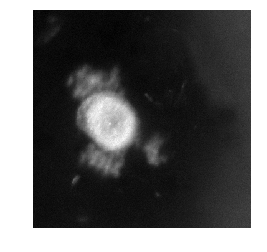

In [3]:
im = io.imread(filename2, as_grey=True)

im_crop = im[(660-175):(660+175),(750-175):(750+175)] #im 1,2, 6
#im_crop = im[(660-175):(660+175),(180-175):(180+175)] #im 3
#im_crop = im[(560-175):(560+175),(850-175):(850+175)] #im 4,5

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(im_crop, cmap=plt.cm.gray)
ax.axis('off')
plt.show()

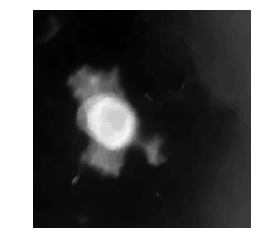

In [21]:
se = morphology.disk(10)
closed = morphology.closing(im_crop,se)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(closed, cmap=plt.cm.gray)
ax.axis('off')
plt.show()

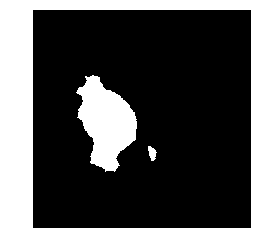

In [22]:
level = filters.threshold_otsu(closed)
bw = closed > level

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(bw, cmap=plt.cm.gray)
ax.axis('off')
plt.show()

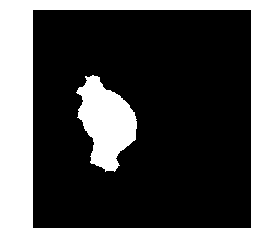

In [23]:
bw2 = morphology.remove_small_objects(bw,675)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(bw2, cmap=plt.cm.gray)
ax.axis('off')
plt.show()

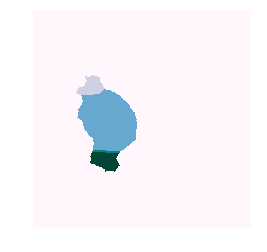

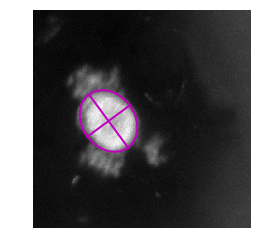

In [24]:
distance = ndimage.distance_transform_edt(bw2)

#local_maxi = peak_local_max(distance,indices = False, footprint =np.ones((3,3)), labels =bw2)

h = 0.05
local_maxi = extrema.h_maxima(distance, h) 

markers = morphology.label(local_maxi)
markers_ws = markers
labels_ws = watershed(-distance,markers_ws,mask=bw2, compactness =0)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(labels_ws, cmap=plt.cm.PuBuGn)
ax.axis('off')
plt.show()

props = measure.regionprops(labels_ws)

temp = 0
for i in range(0,len(props)):
    if props[i].area > temp:
        temp = props[i].area
        biggest = i
        
major = props[biggest].major_axis_length
minor = props[biggest].minor_axis_length
angle = props[biggest].orientation    #in rad, -pi/2 to pi/2
centroid = props[biggest].centroid

#draw fitted ellipse
t = np.linspace(0,2*math.pi,num=50)
a = major/2
b = minor/2
Xc = centroid[1]
Yc = centroid[0]
phi = -angle
ellipx = Xc + a*np.cos(t)*np.cos(phi) - b*np.sin(t)*np.sin(phi)
ellipy = Yc + a*np.cos(t)*np.sin(phi) + b*np.sin(t)*np.cos(phi)

#draw lines along the axes
xMajor = [Xc - a*np.cos(phi), Xc + a*np.cos(phi)]
yMajor = [Yc - a*np.sin(phi), Yc + a*np.sin(phi)]

xMinor = [Xc - b*np.cos(phi - math.pi/2), Xc + b*np.cos(phi - math.pi/2)]
yMinor = [Yc - b*np.sin(phi - math.pi/2), Yc + b*np.sin(phi - math.pi/2)]

#overlay cropped im and ellipse fit
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(im_crop, cmap=plt.cm.gray)
ax.plot(ellipx,ellipy, color ='m', linewidth = 2.0)
ax.plot(xMajor,yMajor, color ='m', linewidth = 2.0)
ax.plot(xMinor,yMinor, color ='m', linewidth = 2.0)
ax.axis('off')
plt.show()


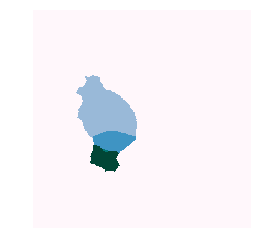

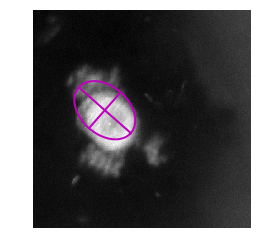

In [25]:
markers_rw = markers
markers_rw[~bw2] = -1
labels_rw = segmentation.random_walker(bw2, markers_rw)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(labels_rw, cmap=plt.cm.PuBuGn)
ax.axis('off')
plt.show()

props = measure.regionprops(labels_rw)

temp = 0
for i in range(0,len(props)):
    if props[i].area > temp:
        temp = props[i].area
        biggest = i
        
major = props[biggest].major_axis_length
minor = props[biggest].minor_axis_length
angle = props[biggest].orientation    #in rad, -pi/2 to pi/2
centroid = props[biggest].centroid

#draw fitted ellipse
t = np.linspace(0,2*math.pi,num=50)
a = major/2
b = minor/2
Xc = centroid[1]
Yc = centroid[0]
phi = -angle
ellipx = Xc + a*np.cos(t)*np.cos(phi) - b*np.sin(t)*np.sin(phi)
ellipy = Yc + a*np.cos(t)*np.sin(phi) + b*np.sin(t)*np.cos(phi)

#draw lines along the axes
xMajor = [Xc - a*np.cos(phi), Xc + a*np.cos(phi)]
yMajor = [Yc - a*np.sin(phi), Yc + a*np.sin(phi)]

xMinor = [Xc - b*np.cos(phi - math.pi/2), Xc + b*np.cos(phi - math.pi/2)]
yMinor = [Yc - b*np.sin(phi - math.pi/2), Yc + b*np.sin(phi - math.pi/2)]

#overlay cropped im, ellipse fit, axes lines
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(im_crop, cmap=plt.cm.gray)
ax.plot(ellipx,ellipy, color ='m', linewidth = 2.0)
ax.plot(xMajor,yMajor, color ='m', linewidth = 2.0)
ax.plot(xMinor,yMinor, color ='m', linewidth = 2.0)
ax.axis('off')
plt.show()
